# The Multinomial Distribution: A Quick Review

The multinomial distribution is easiest illustrated through the use of a theoretical (and potentially unfair) $k$-sided die, which you roll $n$ times.  Letting $N_j \in \{0, \ldots, n\}$ represent the number of times that the $j$th side appears, the multinomial distribution models the probability distribution on the space of $k$-dimensional count vectors $N = (N_1, \ldots, N_k)$. 

**_If you're comfortable with the multinomial distribution and don't want to get bogged down with derivation and more detailed notation, please feel free to skip to the next section._**

More generally, let $X$ denote a discrete random variable that takes on one of $k$ values $\{1, \ldots, k\}$.  Let $\vec{p} = (p_1, \ldots, p_k)$ denote the vector whose $i$th entry encodes the probability mass on the $i$th outcome, so 
$$
\mathbb{P}(X = i | \vec{p}) = \prod_{j=1}^k p_j^{\delta_j(i)}.
$$
Here, $\delta_j$ is the indicator function such that
$$
\delta_j(i)=
 \begin{cases} 
      1 & i=j \\
      0 & i \neq j  
   \end{cases}.
$$

Let $\vec{X} = (X_1, \ldots, X_n)$ denote the random sample vector obtained from taking $n$ i.i.d. samples from $X$, and denote sampled values by $\vec{x} = (x_1, \ldots, x_n)$.  Then 
\begin{align*}
\mathbb{P}(\vec{X} = (x_1, \ldots, x_n) | \vec{p}) &= \prod_{i=1}^n \mathbb{P}(X_i = x_i | \vec{p}) \\
&= \prod_{i=1}^n \bigg( \prod_{j=1}^k p_j^{\delta_j(x_i)} \bigg) \\
&= \prod_{j=1}^k  \bigg( \prod_{i=1}^n p_j^{\delta_j(x_i)} \bigg)\\
&= \prod_{j=1}^k  p_j^{n_j} ,
\end{align*}
where $n_j = \sum_{i=1}^n\delta_j(x_i)$ is the number of occurrences of outcome $j$.

Let $\vec{N} = (N_1, \ldots, N_k)$ denote the random count vector obtained from taking $n$ i.i.d. samples from $X$, and denote sampled values of this count vector by $\vec{n} = (n_1, \ldots, n_k)$.  Then in order to obtain the probability distribution on this random vector, we need only take into account all possible permutations to yield
$$
\mathbb{P}(\vec{N} = (n_1, \ldots, n_k) | \vec{p}) = {n\choose n_1\ldots n_k} \prod_{j=1}^k  p_j^{n_j}.
$$
We have now arrived at the probability mass function corresponding to the familiar multinomial distribution :).  It provides ... should probably develop this more.

Recall some special cases:
* Setting $n=1$ yields the **categorical distribution**.
* Setting $k=2$ yields the **binomial distribution**.

# Some Motivating Data, The Probability Simplex

To motivate the Dirichlet distribution, let's consider some simple data.

Say you're given a three-sided die, which you have rolled 30 times.  Say the corresponding count vector is given by $(n_1, \ldots, n_3) = (5, 10, 15)$, so we have rolled a "1" precisely five times, have produced "2" ten times, and have rolled a "3" fifteen times.  Using this information, you would like to provide an estimate for the true probabilities of rolling each side.  

Denote your estimate for the probability of rolling the $i$th side by $\hat{p}_i$.  Intuition perhaps tells us that one potential estimate is given by 

$$
\hat{p}_i = \frac{n_i}{n_1 + n_2 + n_3}.
$$

That is, one potential estimate is $\hat{p}_1 = \frac{5}{30}$, $\hat{p}_2 = \frac{10}{30}$, $\hat{p}_3 = \frac{15}{30}$.  This corresponds to the maximum likelihood estimate for the probabilities.  (_You should verify this, if it is not immediately obvious.  I have calculated a maximum likelihood estimate [in this blog post](https://alexisbcook.github.io/mle-map-and-coin-flips.html) for a similar case_.)

What if, independent of the data, we have some well-informed beliefs about the underlying probabilities?  That is, what if a friend has told us that she believes the die is fair (or that the probability of rolling each side is $1/3$), and we mostly believe her, but want to also consider what we have learned from the data?

We can encode the beliefs that we had about the die prior to viewing the data by specifying a **prior distribution** on the die-roll probabilities $\vec{p} = (p_1, p_2, p_3)$.  In order to be well-defined, this prior distribution should be specified on the space of all three-dimensional probability vectors

$$
\Delta_{2} = \{ \vec{p} = (p_1, p_2, p_3) : p_1, p_2, p_3 \geq 0, p_1 + p_2 + p_3 = 1\},
$$

known as the 2-dimensional probability simplex.  

> In general, if we want to specify a prior distribution for $\vec{p} = (p_1, \ldots, p_k)$, the probability vector corresponding to $k$ mutually exclusive outcomes, we will use the **$(k-1)$-dimensional probability simplex** 
$$
\Delta_{k-1} = \bigg\{ \vec{p} = (p_1, \ldots, p_k) : p_i \geq 0 \ \forall i\in \{1, \ldots, k\}, \sum_{i=1}^k p_i = 1\bigg\}.
$$

Why _2-dimensional_ (and not 3)?  Well, once we specify $p_1$ and $p_2$, $p_3$ is uniquely determined, since we must have $p_1 + p_2 + p_3 = 1$.  Thus, the space of all probability vectors for 3 outcomes is a 2-dimensional object.  A more visual explanation is obtained by noting that the space of all points in 3-dimensional ($p_1$ corresponds to "$x$" dimension, $p_2$ to "$y$", $p_3$ to "$z$"...) space corresponding to the equation $p_1 + p_2 + p_3 = 1$ is a plane (which is a 2-dimensional object).  Further restricting $0 \leq p_1, p_2, p_3 \leq 1$ yields an equilateral triangle.  This triangle is plotted below.

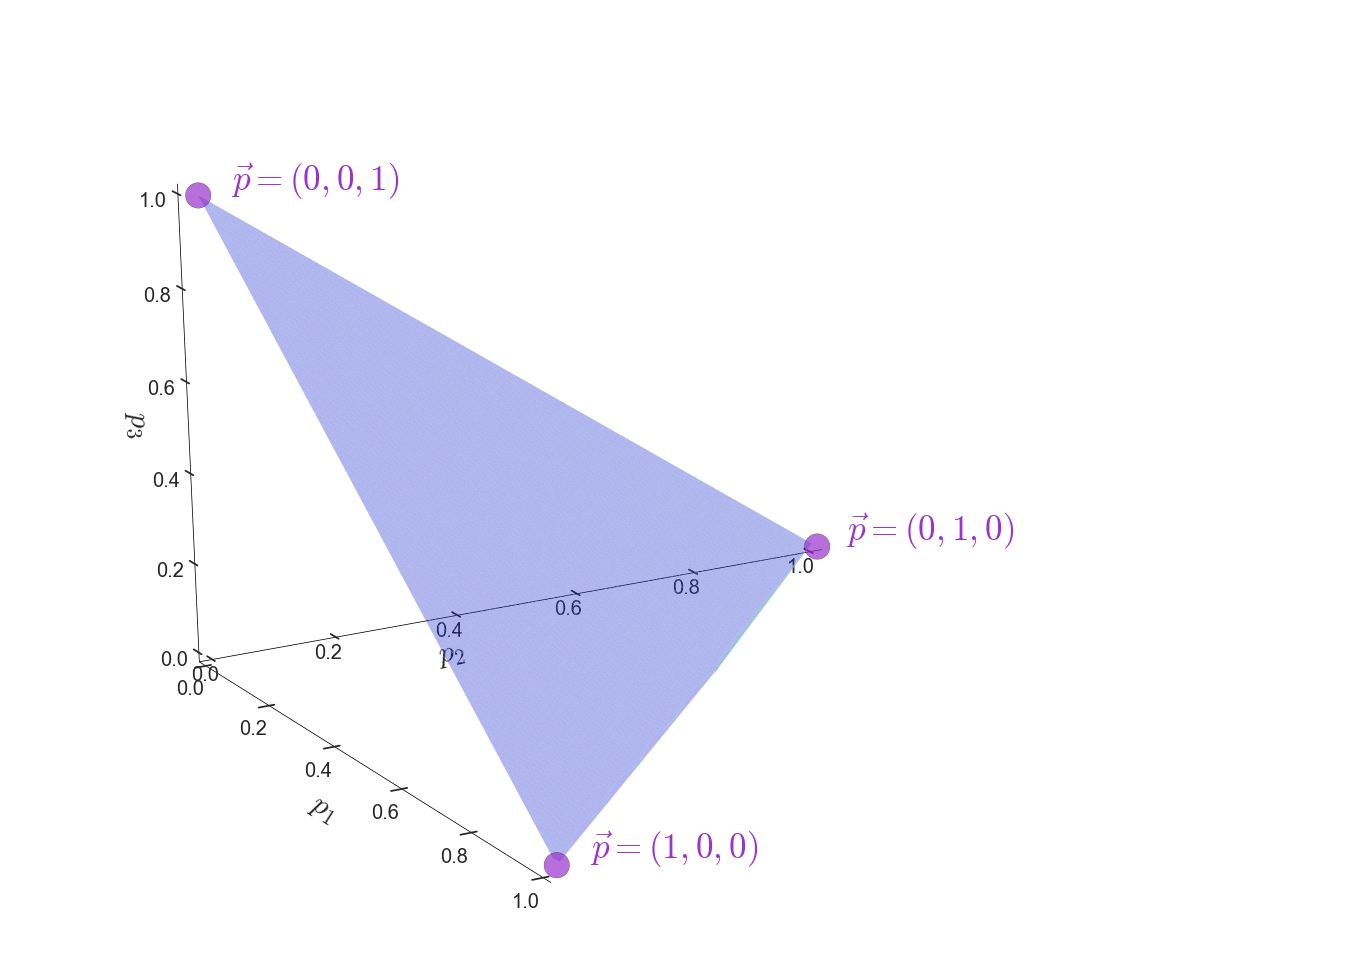

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# make mesh, find the plane
x, y = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
z = (1 - x - y)

# cut off values where z is negative
cut = np.where(z > 0); xc = x[cut]; yc = y[cut]; zc = z[cut]

# set seaborn style
sns.set_style("white")

# plot the surface
ax = plt.figure(figsize=(24,17)).gca(projection='3d')
ax.plot_trisurf(xc, yc, zc, edgecolor='powderblue', alpha=0.3)
ax.set_xlim([0,1]); ax.set_ylim([0,1]); ax.set_zlim([0,1])
ax.set_xlabel(r'$p_1$', labelpad=20, fontsize=30)
ax.set_ylabel(r'$p_2$', labelpad=100, fontsize=30)
ax.set_zlabel(r'$p_3$', labelpad=10, fontsize=30)
ax.tick_params(labelsize=20)

# get rid of the panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# remove the grid
ax.grid(False)

# move the axes, change the view
tmp_planes = ax.zaxis._PLANES 
ax.zaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])
ax.yaxis._PLANES = ( tmp_planes[2], tmp_planes[3], 
                     tmp_planes[0], tmp_planes[1], 
                     tmp_planes[4], tmp_planes[5])
ax.view_init(25, -30)

# plot and annotate points where plane hits axes
x = [1, 0, 0]; y = [0, 1, 0]; z = [0, 0, 1]
ax.scatter(x,y,z, marker='o', s=650, c="darkorchid", alpha=0.7)
ax.text(x[0],y[0]+.05,z[0], '%s' % (r'$\vec{p} = (1,0,0)$'), size=35, 
        color='darkorchid')
ax.text(x[1],y[1]+.05,z[1], '%s' % (r'$\vec{p} = (0,1,0)$'), size=35, 
        color='darkorchid')
ax.text(x[2],y[2]+.05,z[2], '%s' % (r'$\vec{p} = (0,0,1)$'), size=35, 
        color='darkorchid')

plt.show()

But now, how should we go about specifying a probability distribution on this triangle ($\Delta_{2}$)?

In the next section, we introduce the Dirichlet distribution (of order $k$).  It is a probability distribution supported on $\Delta_{k-1}$.  Recall that each element in $\Delta_{k-1}$ is a probability mass function which parametrizes a multinomial distribution (on the count vector corresponding to $k$ mutually exclusive events).  Thus, the Dirichlet distribution can be viewed as a probability distribution on the space of multinomial distributions.  In other words, the Dirichlet distribution can be used to model randomness in a multinomial distribution, and it will prove a useful tool to express uncertainty in a guess for the multinomial distribution that underlies our data.

# The Dirichlet Distribution

Let $\vec{p} = (p_1, \ldots, p_k) \in \Delta_{k-1}$ be a _random_ probability mass function (we emphasize that $\vec{p}$ is a random variable here!).  Let $\vec{\alpha} = (\alpha_1, \ldots, \alpha_k)$ be a vector with $\alpha_i > 0 \ \forall i \in \{1, \ldots, k\}$.  Then $\vec{p}$ is said to follow a **Dirichlet distribution** of order $k$ with parameter vector $\vec{\alpha}$ if it has probability density function given by
$$
\mathbb{P}(\vec{p}|\vec{\alpha}) = \frac{\Gamma(\sum_{i=1}^k \alpha_i)}{\prod_{i=1}^k\Gamma(\alpha_i)}\prod_{i=1}^k p_i^{\alpha_i -1} 
$$
on the simplex $\Delta_{k-1}$ and zero elsewhere.  In order to see how the pdf changes with different values of $\alpha$, let's stick with $k=3$ and graph contours corresponding to different values of $\vec{\alpha} = (\alpha_1, \alpha_2, \alpha_3)$.  We primarily use code from another [author](https://gist.github.com/tboggs/8778945) and only make slight modifications here.

In [10]:
import matplotlib.tri as tri
from functools import reduce

_corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
_triangle = tri.Triangulation(_corners[:, 0], _corners[:, 1])
_midpoints = [(_corners[(i + 1) % 3] + _corners[(i + 2) % 3]) / 2.0 \
              for i in range(3)]

def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.
    Arguments:
        `xy`: A length-2 sequence containing the x and y value.
    '''
    s = [(_corners[i] - _midpoints[i]).dot(xy - _midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

class Dirichlet(object):
    def __init__(self, alpha):
        '''Creates Dirichlet distribution with parameter `alpha`.'''
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)])
    def sample(self, N):
        '''Generates a random sample of size `N`.'''
        return np.random.dirichlet(self._alpha, N)

def draw_pdf_contours(dist, border=False, nlevels=200, subdiv=8, **kwargs):
    '''Draws pdf contours over an equilateral triangle (2-simplex).
    Arguments:
        `dist`: A distribution instance with a `pdf` method.
        `border` (bool): If True, the simplex border is drawn.
        `nlevels` (int): Number of contours to draw.
        `subdiv` (int): Number of recursive mesh subdivisions to create.
        kwargs: Keyword args passed on to `plt.triplot`.
    '''
    from matplotlib import ticker, cm
    import math

    refiner = tri.UniformTriRefiner(_triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]

    plt.tricontourf(trimesh, pvals, nlevels, cmap=plt.cm.rainbow,  **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0-.01, 0.75**0.5+.1)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)
    plt.scatter(_corners[:, 0],_corners[:, 1], marker='o', c='k', alpha=0.7)
    plt.text(0-.22, 0+.04, '%s' % (r'$\vec{p} = (0,0,1)$'), size=12, color='k')
    plt.text(1+.01, 0+.04, '%s' % (r'$\vec{p} = (0,1,0)$'), size=12,color='k')
    plt.text(0.5+.04, 0.75**0.5-.01, '%s' % (r'$\vec{p} = (0,0,1)$'), size=12, color='k')

def plot_points(X, barycentric=True, border=True, **kwargs):
    '''Plots a set of points in the simplex.
    Arguments:
        `X` (ndarray): A 2xN array (if in Cartesian coords) or 3xN array
                       (if in barycentric coords) of points to plot.
        `barycentric` (bool): Indicates if `X` is in barycentric coords.
        `border` (bool): If True, the simplex border is drawn.
        kwargs: Keyword args passed on to `plt.plot`.
    '''
    if barycentric is True:
        X = X.dot(_corners)
    plt.plot(X[:, 0], X[:, 1], 'k.', ms=1, **kwargs)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0-.01, 0.75**0.5+.1)
    plt.axis('off')
    if border is True:
        plt.hold(1)
        plt.triplot(_triangle, linewidth=1)
    plt.scatter(_corners[:, 0],_corners[:, 1], marker='o', c='k', alpha=0.7)
    plt.text(0-.22, 0+.04, '%s' % (r'$\vec{p} = (0,0,1)$'), size=12, color='k')
    plt.text(1+.01, 0+.04, '%s' % (r'$\vec{p} = (0,1,0)$'), size=12,color='k')
    plt.text(0.5+.04, 0.75**0.5-.01, '%s' % (r'$\vec{p} = (0,0,1)$'), size=12, color='k')

def plot_contours(alpha):
    dist = Dirichlet(alpha)
    draw_pdf_contours(dist)
    title = r'$\vec{\alpha}$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, size=14)
    
def plot_sample(alpha):
    dist = Dirichlet(alpha)
    plot_points(dist.sample(5000))
    title = r'$\vec{\alpha}$ = (%.3f, %.3f, %.3f)' % tuple(alpha)
    plt.title(title, size=14)
    
def plot_contours_and_sample(alpha):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1) 
    plot_contours(alpha)
    plt.subplot(1, 2, 2)
    plot_sample(alpha)
    plt.subplots_adjust(right=1.4)

We begin by setting $\vec{\alpha} = (1, 1, 1)$, which yields the uniform distribution on the 2-simplex $\Delta_2$.  Below, we visualize a contour plot, which appears as one color (each point is equally probable).

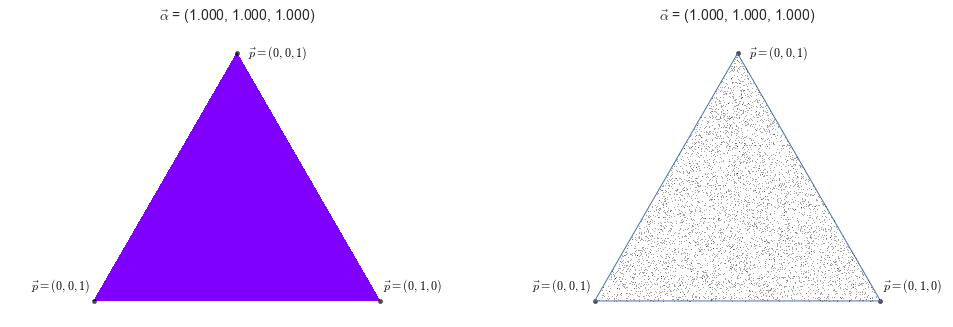

In [3]:
plot_contours_and_sample([1, 1, 1])

Next, we visualize the Dirichlet distribution corresponding to $\vec{\alpha} = (3, 3, 3)$.  In all contour plots, purple corresponds to less probable regions, and red corresponds to areas with higher probability density.  pretty sure that the die is fair, but not completely certain - and have no reason to believe that one side is more likely than any other.

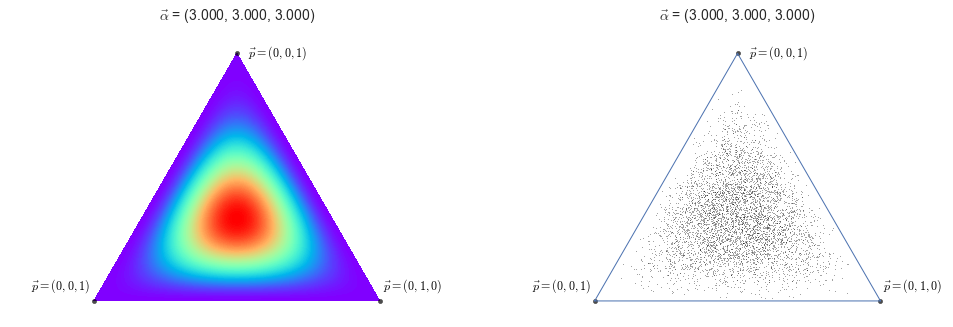

In [4]:
plot_contours_and_sample([3, 3, 3])

Next, we show $\vec{\alpha} = (.5, .5, .5)$.  Still have the symmetry, but now most of the probability mass has been shoved to the corners (have to look really closely in density plot).  pretty sure that die is unfair, as the point in the simplex with the least probability mass is $\vec{p} = (\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$ and have no reason to favor one side over another.

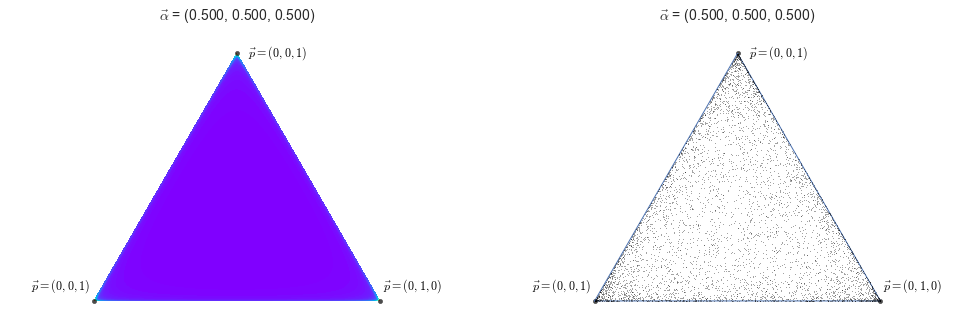

In [5]:
plot_contours_and_sample([.5, .5, .5])

Symmetric Dirichlet distributions.  choose when All outcomes equally probable (or have no reason to favor one over another).  

In general, we can always write $\vec{\alpha}$ as the product of a scalar $\alpha_0$ (known as the concentration parameter) and a vector $\vec{m} \in \Delta_{k-1}$ (known as the base measure), which corresponds to the mean of the distribution.  If $\alpha_0 > 1$, $\vec{m}$ corresponds to the point in the simplex with the highest probability density; otherwise, it is the least probable pmf.  We illustrate this with a few more examples.

Below, no reason to favor outcome 1 over outcome 2, but believe outcome 3 is most probable.  This is an appropriate prior distribution to choose for our data if believe most likely pmf to parametrize our multinomial distribution is $(\frac{1}{4}, \frac{1}{4}, \frac{1}{2})$, but want to allow some wiggle room.

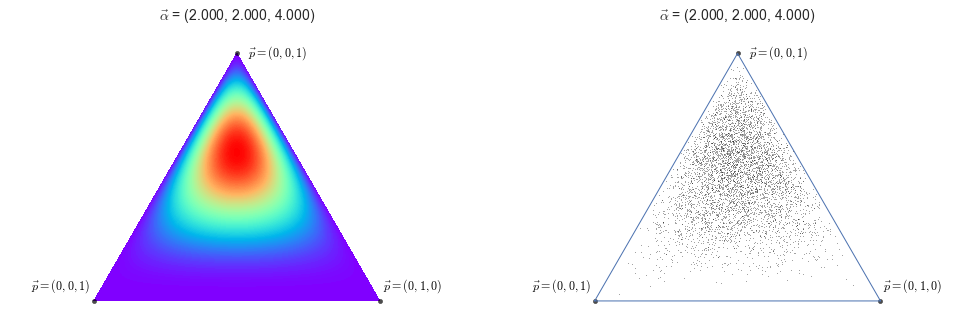

In [13]:
plot_contours_and_sample([2, 2, 4])

distribution below provides less wiggle room than the one above, and guesses that the most likely pmf is $(\frac{1}{7}, \frac{2}{7}, \frac{4}{7})$.

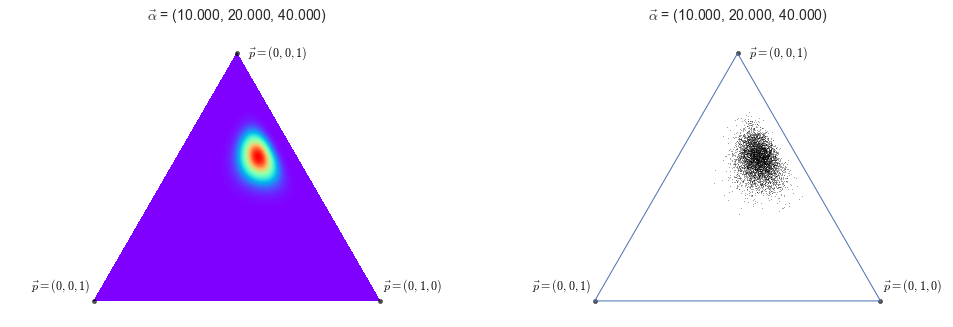

In [14]:
plot_contours_and_sample([10,20,40])

# Sampling from the Dirichlet Distribution